# Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import operator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

The *input_id* corresponds to the dataset used in this analysis. (See *Input* directory for more information)

In [2]:
input_id = 1

Number of Pricipal Components kept by PCA

In [3]:
N_PCs = 3

### Load Selected Features from *Feature_Extraction_and_Selection* Stage

In [4]:
with open('Kernel/selected_features_{}.pkl'.format(input_id), 'rb') as f:
    selected_features = pickle.load(f)

selected_names = selected_features.columns
selected_features.head()

,voltage_C__quantile__q_0.9,"voltage_C__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""",voltage_C__quantile__q_0.8,"voltage_A__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""","voltage_C__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","voltage_A__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","voltage_C__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","voltage_C__fft_coefficient__attr_""abs""__coeff_3","voltage_A__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","current_C__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",...,"current_A__fft_coefficient__attr_""abs""__coeff_47","current_C__fft_coefficient__attr_""abs""__coeff_15",voltage_A__number_peaks__n_5,"voltage_C__fft_coefficient__attr_""abs""__coeff_89","current_B__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2",current_B__quantile__q_0.3,"current_B__fft_coefficient__attr_""abs""__coeff_79",voltage_B__ar_coefficient__coeff_7__k_10,"voltage_A__fft_coefficient__attr_""abs""__coeff_63","voltage_C__fft_coefficient__attr_""abs""__coeff_23"
1.0,0.553191,0.002046,0.546099,0.001684,0.000191,0.000159,0.000069,15.736300,0.000059,0.000423,...,1.331315,3.427572,42.0,0.889698,0.046625,0.437961,1.847918,0.108411,1.032564,1.228813
2.0,0.553191,0.002082,0.539007,0.001669,0.000194,0.000158,0.000070,15.676337,0.000057,0.000429,...,2.450082,4.572508,28.0,0.567752,0.041185,0.428732,1.478094,-0.132434,0.327802,0.522790
3.0,0.553191,0.001914,0.546099,0.001750,0.000178,0.000161,0.000063,13.682603,0.000060,0.000416,...,1.840547,2.288938,36.0,0.165127,0.038373,0.435674,1.944967,0.083080,0.556094,0.890504
4.0,0.553191,0.002068,0.546099,0.001718,0.000189,0.000161,0.000068,14.229548,0.000059,0.000430,...,2.121485,2.467810,40.0,1.413782,0.043472,0.437279,1.574747,0.100425,1.170660,1.064812
5.0,0.553191,0.002107,0.539007,0.001582,0.000193,0.000153,0.000070,15.447208,0.000057,0.000431,...,1.599315,5.077966,32.0,0.913412,0.035008,0.426726,0.947105,0.099299,0.822158,0.519041


In [5]:
with open('Kernel/final_target_{}.pkl'.format(input_id), 'rb') as f:
    target = pickle.load(f)

### Standardize Features

In [6]:
scaler = StandardScaler().fit(selected_features)
scaled_features = scaler.transform(selected_features)

### Apply PCA

In [7]:
pca = PCA(n_components=N_PCs)
pca.fit(scaled_features)

reduced_features = pca.transform(scaled_features)

### PCA Analysis

In [8]:
variation_kept = pca.explained_variance_ratio_*100

print(30*'-')
print('Variation maintained: {:.2f}%'.format(variation_kept.sum()))
print(30*'-')
print('Number of Selected Features: ', selected_features.shape[1])
print('Number of Reduced Features: ', reduced_features.shape[1])
print(30*'-')

------------------------------
Variation maintained: 33.01%
------------------------------
Number of Selected Features:  994
Number of Reduced Features:  3
------------------------------


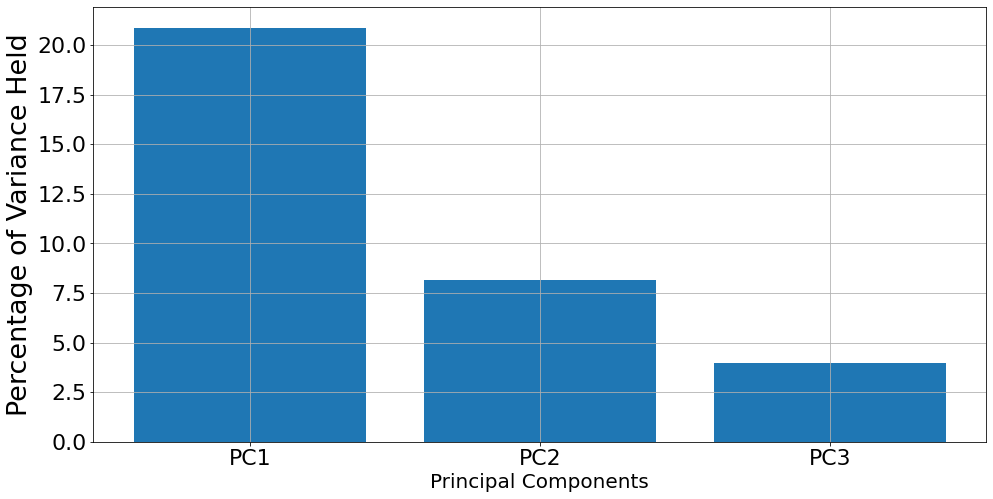

In [9]:
fig = plt.figure(figsize=[16,8])
ax = fig.subplots(1,1)
ax.bar(x=['PC' + str(x) for x in range(1,(N_PCs+1))],height=variation_kept[0:N_PCs])
ax.set_ylabel('Percentage of Variance Held',fontsize=27)
ax.set_xlabel('Principal Components',fontsize=20)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.grid()
plt.show()
fig.savefig('PCA_Analysis/Percentage_of_Variance_Held__{}.png'.format(input_id), bbox_inches='tight')

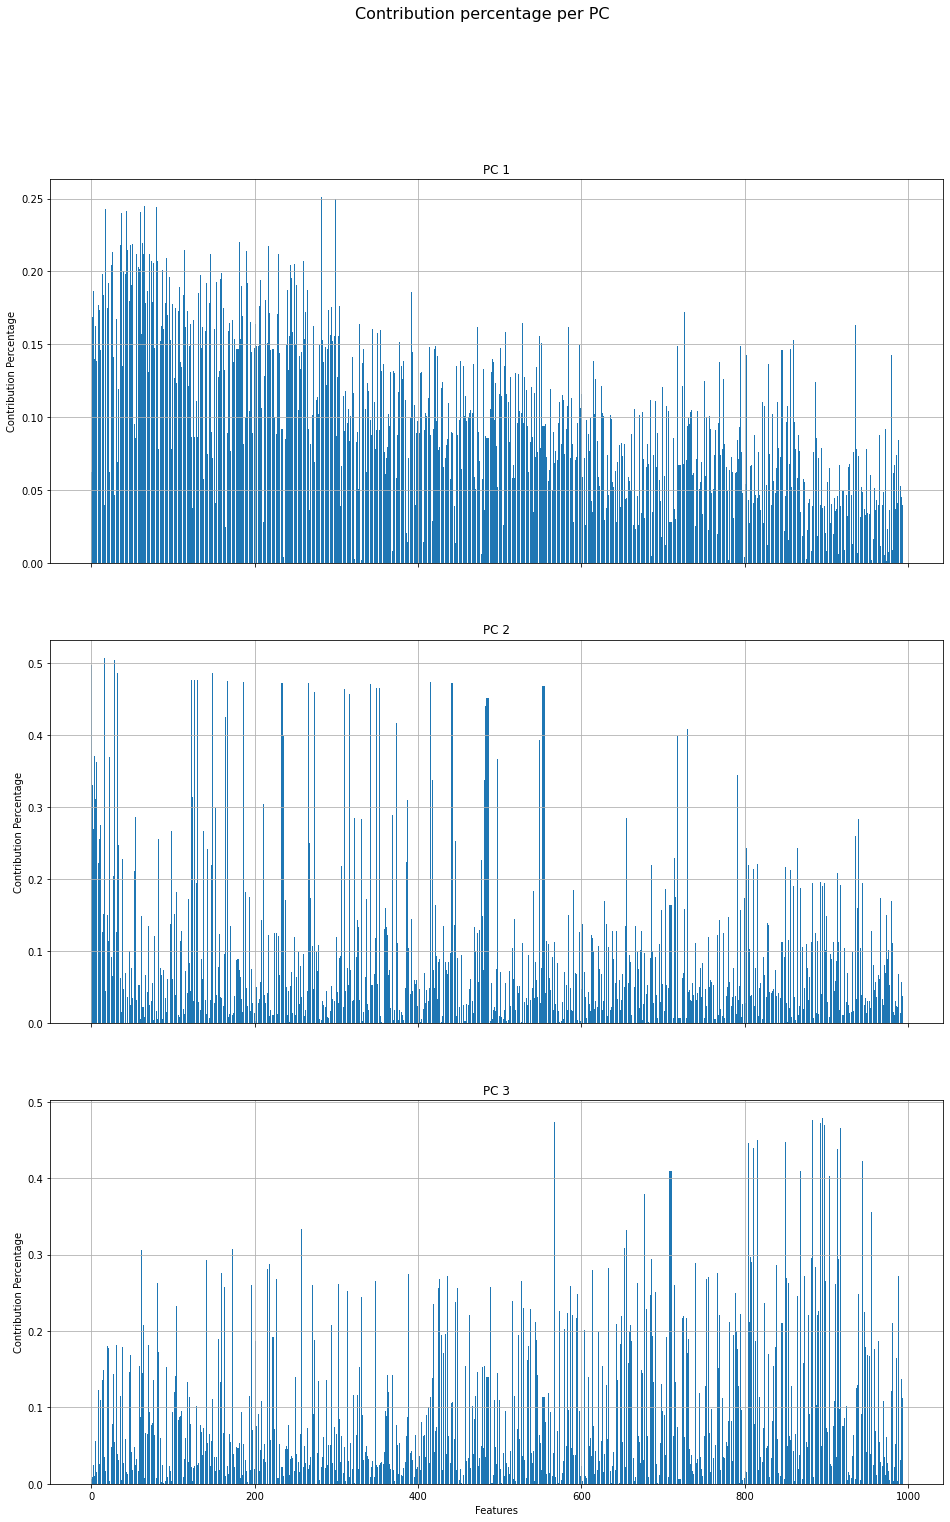

In [10]:
eigen_matrix = abs(np.array(pca.components_))

for i in range (eigen_matrix.shape[0]):
    LineSum = sum(eigen_matrix[i,:])
    for j in range (eigen_matrix.shape[1]):
        eigen_matrix[i,j] = ((eigen_matrix[i,j]*100)/LineSum)
        
        
fig = plt.figure(figsize=[16,int(8*N_PCs)])
fig.suptitle('Contribution percentage per PC', fontsize=16)

ax = fig.subplots(int(N_PCs),1)

for i in range (int(N_PCs)):
    s = eigen_matrix[i,:]
    ax[i].bar(x=range(0,(eigen_matrix.shape[1])),height=s)
    ax[i].set(xlabel='Features', ylabel='Contribution Percentage', title = 'PC ' + str(i+1))
    ax[i].grid()

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for axs in ax.flat:
        axs.label_outer()

plt.show()
fig.savefig('PCA_Analysis/Contribution_Percentage_Per_PC_{}.png'.format(input_id), bbox_inches='tight')

In [11]:
# Weighted Contribution for each feature
weighted_contribution = (eigen_matrix.T * variation_kept.T).sum(1)/variation_kept.sum()

df_weighted_contribution = pd.DataFrame(weighted_contribution.reshape(1,-1), columns=selected_names)                
df_weighted_contribution = df_weighted_contribution.sort_values(by=0, axis=1, ascending=False)

df_weighted_contribution

,voltage_A__quantile__q_0.1,voltage_A__quantile__q_0.2,voltage_A__sum_of_reoccurring_data_points,"voltage_C__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""","voltage_A__fft_coefficient__attr_""abs""__coeff_0",voltage_A__mean,"voltage_A__fft_coefficient__attr_""real""__coeff_0",voltage_A__sum_values,"voltage_A__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""","voltage_A__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",...,"voltage_C__fft_coefficient__attr_""abs""__coeff_89","current_A__fft_coefficient__attr_""abs""__coeff_84",voltage_B__fourier_entropy__bins_10,"current_B__fft_coefficient__attr_""abs""__coeff_56","voltage_C__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0",voltage_B__fourier_entropy__bins_3,voltage_C__fourier_entropy__bins_3,voltage_A__fourier_entropy__bins_3,voltage_B__sample_entropy,current_B__max_langevin_fixed_point__m_3__r_30
0,0.203157,0.20173,0.193962,0.189591,0.188748,0.188748,0.188748,0.188748,0.187485,0.186656,...,0.032202,0.031695,0.02855,0.027649,0.027523,0.026646,0.024091,0.022728,0.021495,0.020694


In [12]:
#Creating Separated dictionaries for Sensors and Features Contribution 
sensors_names = [None] * int(df_weighted_contribution.shape[1])
features_names = [None] * int(df_weighted_contribution.shape[1])
general_features = [None] * int(df_weighted_contribution.shape[1])

for i, names in zip(range (df_weighted_contribution.shape[1]), df_weighted_contribution.columns):
    c = '__'
    words = names.split(c)
    sensors_names[i] = words[0]
    general_features[i]= words[1]
    features_names[i] = c.join(words[1:])
    
unique_sensors_names = np.unique(sensors_names).tolist()
unique_general_features = np.unique(general_features).tolist()
unique_features_names = np.unique(features_names).tolist()


sensors_contribution = dict.fromkeys(unique_sensors_names, 0)
general_features_contribution = dict.fromkeys(unique_general_features, 0)
features_contribution = dict.fromkeys(unique_features_names, 0)

In [13]:
#Creating dictionaries from Data Frame orientation
weighted_contribution = {}
for col in df_weighted_contribution.columns:
    parts = col.split(c)
    
    kind = parts[0]
    feature = c.join(parts[1:])
    feature_name = parts[1]
    
    if kind not in weighted_contribution:
        weighted_contribution[kind] = {}
    
    sensors_contribution[kind] += df_weighted_contribution.loc[0,col]
    general_features_contribution[feature_name] += df_weighted_contribution.loc[0,col]
    features_contribution[feature] += df_weighted_contribution.loc[0,col]
    weighted_contribution[kind][feature] = df_weighted_contribution.loc[0,col]                        

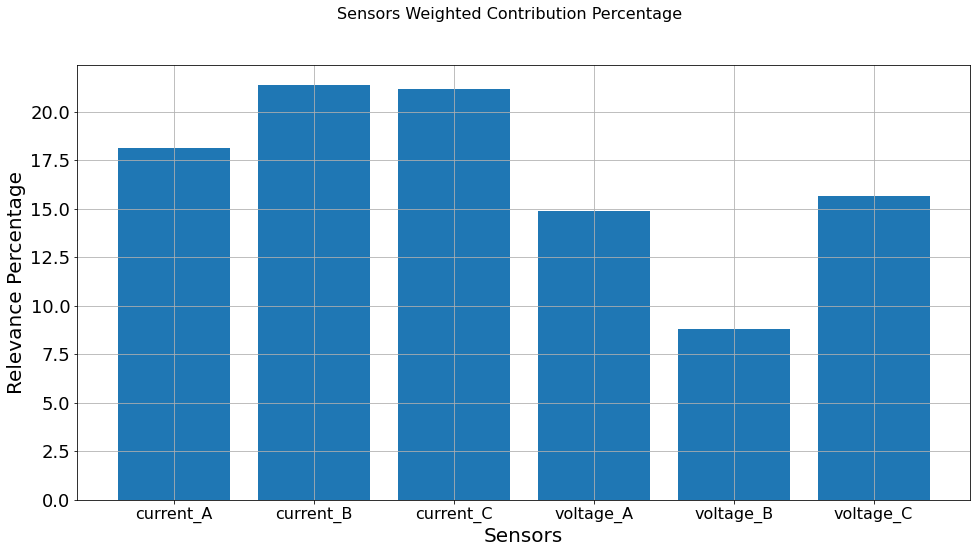

In [14]:
#Ploting Contribution Sensors Results
                    
fig = plt.figure(figsize=[16,8])

fig.suptitle('Sensors Weighted Contribution Percentage', fontsize=16)

ax = fig.subplots(1,1)
s = sensors_contribution
ax.bar(*zip(*s.items()))
plt.ylabel('Relevance Percentage',fontsize = 20)
plt.xlabel('Sensors',fontsize = 20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=18)
ax.grid()

plt.show()
fig.savefig('PCA_Analysis/Sensor_Weighted_Contribution_Percentage_{}.png'.format(input_id), bbox_inches='tight')


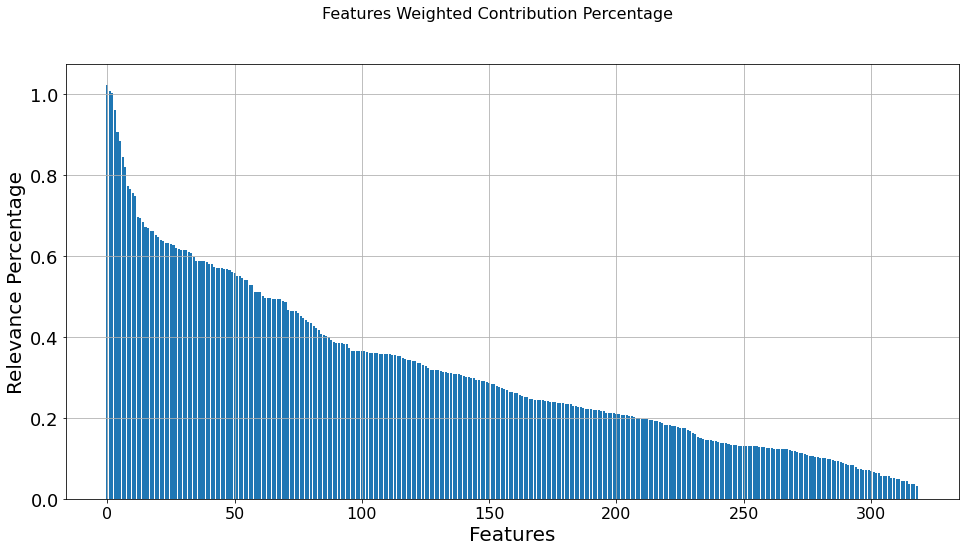

In [15]:
#Ploting Cntribution Features Results
fig = plt.figure(figsize=[16,8])

fig.suptitle('Features Weighted Contribution Percentage', fontsize=16)
ax = fig.subplots(1,1)
s = dict(sorted(features_contribution.items(), key=lambda item: item[1], reverse=True))

ax.bar(np.arange(len(s)), s.values())
         
plt.ylabel('Relevance Percentage',fontsize = 20)
plt.xlabel('Features',fontsize = 20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=18)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
plt.grid()
plt.show()
fig.savefig('PCA_Analysis/Features_Weighted_Contribution_Percentage_{}.png'.format(input_id), bbox_inches='tight')


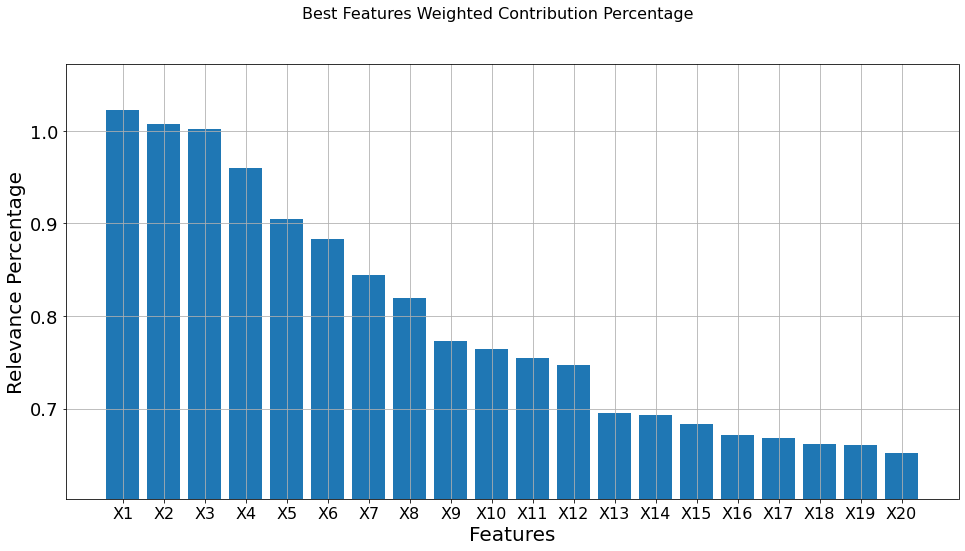

In [16]:
### 20 best features ###

fig = plt.figure(figsize=[16,8])

fig.suptitle('Best Features Weighted Contribution Percentage', fontsize=16)

ax = fig.subplots(1,1)

s_20 = list(s.values())[0:20]

ax.bar(x=['X' + str(x) for x in range(1,(20+1))],height=s_20)
plt.ylabel('Relevance Percentage',fontsize = 20)
plt.xlabel('Features',fontsize = 20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=18)
ax.grid()
ax.set_ylim([s_20[-1]-0.05,s_20[0]+0.05])
plt.show()
fig.savefig('PCA_Analysis/{}th_Best_Features_Weighted_Contribution_Percentage_{}.png'.format(20,input_id), bbox_inches='tight')


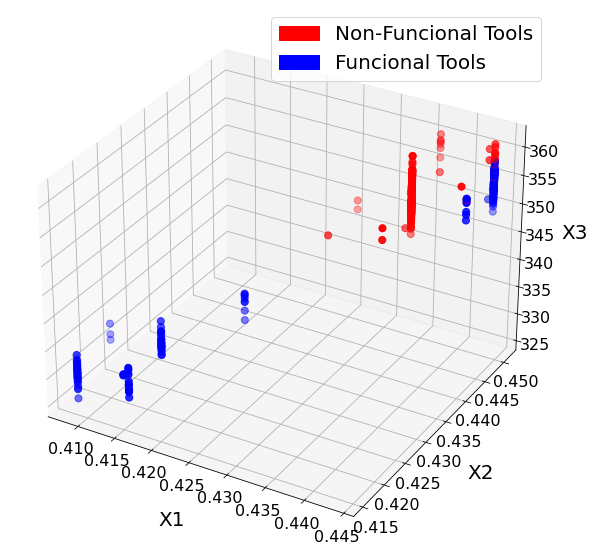

In [17]:
#Ploting the data of the most relevant sensor with the best features

name_1 = df_weighted_contribution.columns[0]
name_2 = df_weighted_contribution.columns[1]
name_3 = df_weighted_contribution.columns[2]

x = selected_features.loc[:,name_1].values
y = selected_features.loc[:,name_2].values
z = selected_features.loc[:,name_3].values
                    

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(111, projection='3d')

colors = np.empty(len(target), dtype=str)
colors[target==0] = 'blue'
colors[target==1] = 'red'

ax.scatter(x, y, z, c=colors, s=50)

plt.ylabel('X2',fontsize = 20,labelpad=18)
plt.xlabel('X1',fontsize = 20, labelpad=18)
ax.set_zlabel('X3', fontsize = 20, labelpad=12)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='z', labelsize=16)
ax.grid()
red_patch = mpatches.Patch(color='red', label='Non-Funcional Tools')
blue_patch = mpatches.Patch(color='blue', label='Funcional Tools')
plt.legend(handles=[red_patch,blue_patch],fontsize = 20)
plt.show()
fig.savefig('PCA_Analysis/ScatterPlot_PCA_{}.png'.format(input_id), bbox_inches='tight')
                    

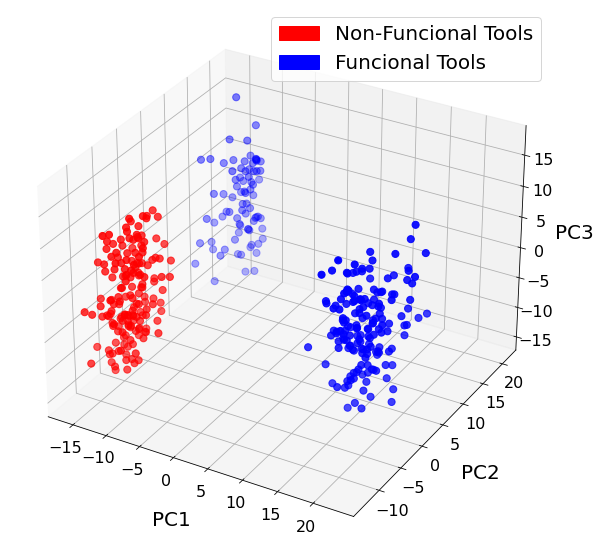

In [18]:
#Ploting the projected data

x = reduced_features[:,0]
y = reduced_features[:,1]
z = reduced_features[:,2]
                    

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(111, projection='3d')

colors = np.empty(len(target), dtype=str)
colors[target==0] = 'blue'
colors[target==1] = 'red'

ax.scatter(x, y, z, c=colors, s=50)

plt.ylabel('PC2',fontsize = 20,labelpad=18)
plt.xlabel('PC1',fontsize = 20, labelpad=18)
ax.set_zlabel('PC3', fontsize = 20, labelpad=12)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='z', labelsize=16)
ax.grid()
red_patch = mpatches.Patch(color='red', label='Non-Funcional Tools')
blue_patch = mpatches.Patch(color='blue', label='Funcional Tools')
plt.legend(handles=[red_patch,blue_patch],fontsize = 20)
plt.show()
fig.savefig('PCA_Analysis/PCA_visualization_{}.png'.format(input_id), bbox_inches='tight')
                    

### Saving files for next stages

In [19]:
with open('Kernel/pca_scaler_{}.pkl'.format(input_id), 'wb') as f:
    pickle.dump(scaler, f)
    
with open('Kernel/pca_{}.pkl'.format(input_id), 'wb') as f:
    pickle.dump(pca, f)
    
with open('Kernel/reduced_features_{}.pkl'.format(input_id), 'wb') as f:
    pickle.dump(reduced_features, f)